In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import add_dummy_feature
sns.set_theme()

In [10]:
m = 200
rng = np.random.default_rng()
X = 2 * rng.random((m,1))
X_b = add_dummy_feature(X)
y = 4 + X + rng.standard_normal((m,1))
epochs = 1000

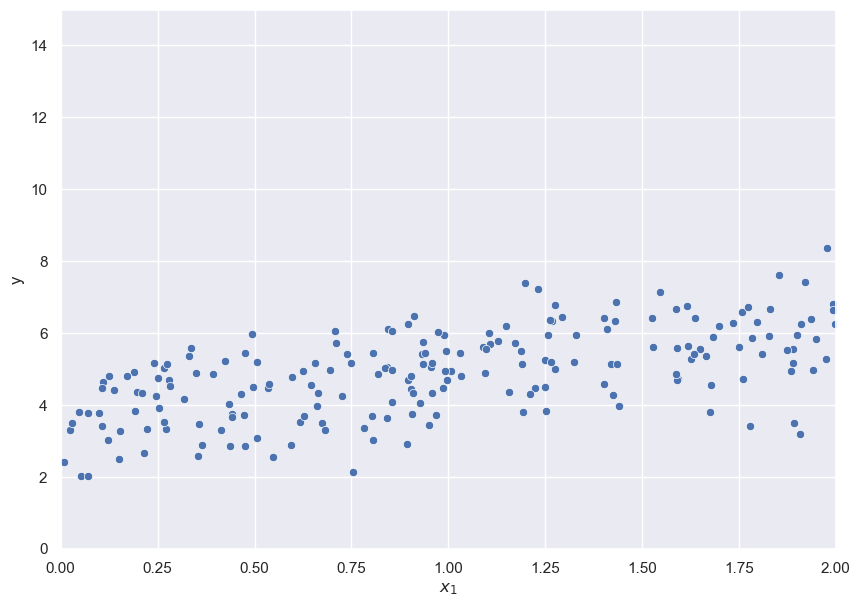

In [11]:
fig, ax = plt.subplots(figsize = (10,7))

sns.scatterplot(x=X.flatten(), y=y.flatten(), ax=ax)
plt.xlabel('$x_1$')
plt.ylabel('y')
plt.axis([0,2,0,15])
plt.show()

In [12]:
theta =  rng.standard_normal((2,1))
eta = 0.1
theta

array([[0.26468975],
       [1.45487346]])

In [13]:
J = np.zeros(epochs)

for i in range(epochs):
    rng_idx = rng.choice(range(len(X_b)))
    
    X_b2 = X_b[rng_idx].reshape(1,-1)
    y2 = y[rng_idx].reshape(1,-1)
        
    gradients =  2 * X_b2.T @ (X_b2 @ theta - y2)
    theta -= eta*gradients
    
    J[i] = ((X_b2@theta - y2)**2).sum()

theta

array([[3.36514802],
       [1.68584298]])

In [14]:
y_prediccion = X_b @ theta

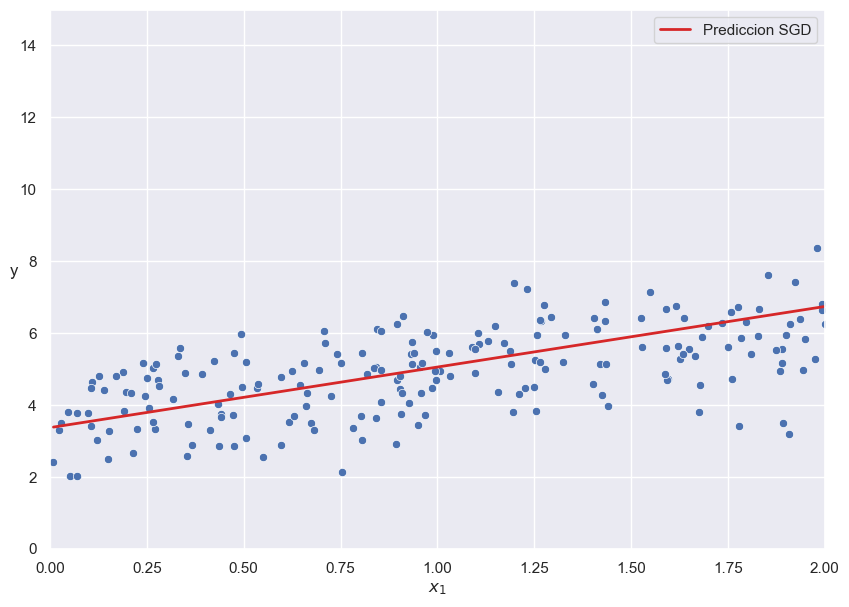

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x=X.flatten(), y=y.flatten(), ax=ax)
sns.lineplot(x=X.flatten(), y=y_prediccion.flatten(), color='tab:red', linewidth=2, label='Prediccion SGD')
plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.axis([0,2,0,15])
plt.show()

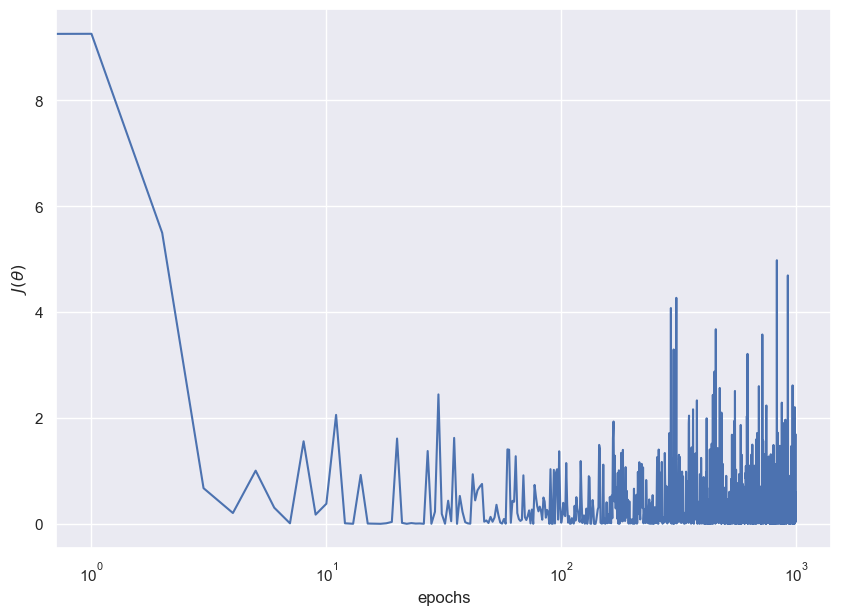

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x=np.arange(epochs), y=J)
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.xscale('log')
plt.show()